In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글폰트 다운로드

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import re
import folium

import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import BeautifyIcon

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')
# 폰트 불러오기

In [ ]:
# Pandas 디스플레이 옵션 설정
pd.set_option('display.max_columns', None)  # 모든 열 보이기
pd.set_option('display.max_rows', None)     # 모든 행 보이기
pd.set_option('display.width', 1000)        # 출력 너비 설정
pd.set_option('display.max_colwidth', None) # 열의 최대 너비 설정

In [ ]:
%cd /content/drive/MyDrive/final_project/data/final_dataset

/content/drive/MyDrive/final_project/data/final_dataset


In [ ]:
total_data = pd.read_csv('total_data_v5.csv', encoding = 'cp949')
department_store = pd.read_excel('/content/drive/MyDrive/final_project/data/final_dataset/쇼핑몰,마트_최종.xlsx')

<ipython-input-17-fbf11c7e7177>:1: DtypeWarning: Columns (10,11,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  total_data = pd.read_csv('total_data_v5.csv', encoding = 'cp949')


In [ ]:
df = total_data[total_data['분기']>'2017 2Q']
df['temp'] = df['도로명주소'] + '_' + df['전용면적구간'].astype(str)
group = df.groupby(['temp'])['결측치연속'].agg(['max']).reset_index()
to_del = group[group['max']>5]['temp']
df = df[~df['temp'].isin(to_del)]
df.drop('temp', axis=1, inplace=True)
df.shape

<ipython-input-18-9e7606eef42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['도로명주소'] + '_' + df['전용면적구간'].astype(str)


(590600, 60)

In [ ]:
df['도'] = df['도로명주소'].apply(lambda x: x.split()[0])
df['시군'] = df['도로명주소'].apply(lambda x: ' '+x.split()[1] if x.split()[1].endswith(('시','군','구')) else '')
df['구'] = df['도로명주소'].apply(lambda x: ' '+x.split()[2] if x.split()[2].endswith('구') else '')
df['지역'] = df['도'] + df['시군'] + df['구']

In [ ]:
department_store['도'] = department_store['도로명전체주소'].apply(lambda x: x.split()[0])

In [ ]:
total_data.head()

In [ ]:
department_store.info()

AttributeError: 'dict' object has no attribute 'info'

In [ ]:
department_store['도로명전체주소']

In [ ]:
department_store['도'] = department_store['도로명전체주소'].apply(lambda x: x.split()[0])

In [ ]:
department_store.head()

AttributeError: 'dict' object has no attribute 'head'

In [ ]:
df_2 = df[(df['분기']=='2023 3Q') & (df['전용면적구간']==2)].drop_duplicates('도로명주소')

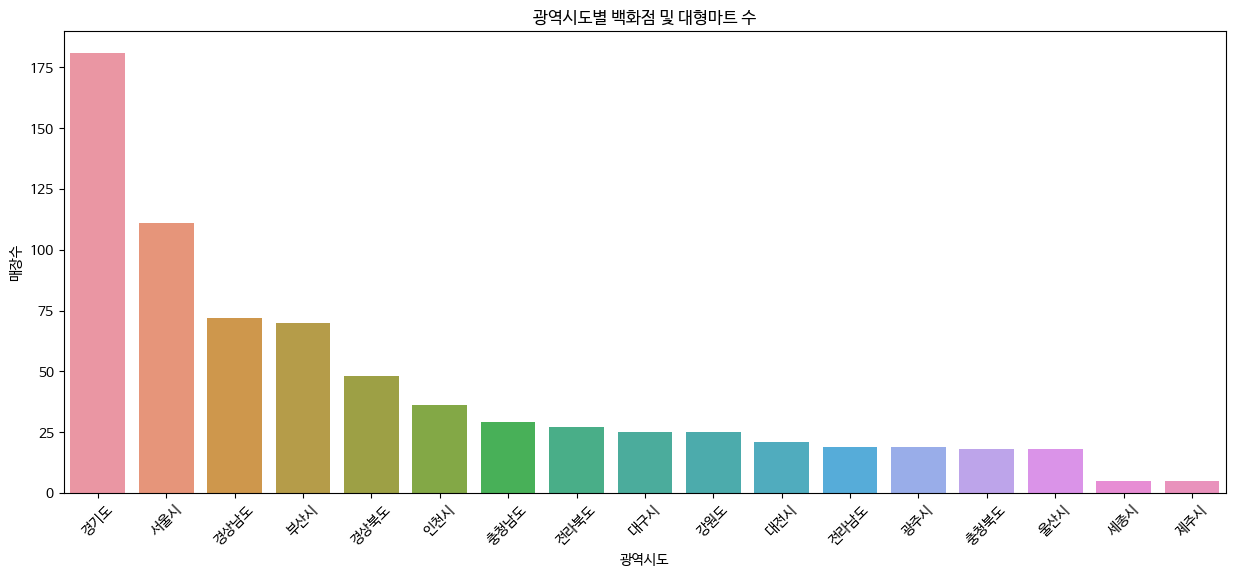

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 카운트
data_count = department_store['도'].value_counts()

# seaborn으로 바 차트 시각화
plt.figure(figsize=(15,6))
sns.barplot(x=data_count.index, y=data_count.values)

# 타이틀 및 라벨 설정
plt.title('광역시도별 백화점 및 대형마트 수')
plt.xlabel('광역시도')
plt.ylabel('매장수')
plt.xticks(rotation=45)

# 바 차트 표시
plt.show()

In [ ]:
department_store['도'] = department_store['도'].replace('울산광역시', '울산시')
department_store['도'] = department_store['도'].replace('울산', '울산시')
department_store['도'] = department_store['도'].replace('부산광역시', '부산시')
department_store['도'] = department_store['도'].replace('강원', '강원도')
department_store['도'] = department_store['도'].replace('강원특별자치도', '강원도')
department_store['도'] = department_store['도'].replace('경남', '경상남도')
department_store['도'] = department_store['도'].replace('대구광역시', '대구시')
department_store['도'] = department_store['도'].replace('대구', '대구시')
department_store['도'] = department_store['도'].replace('전남', '전라남도')
department_store['도'] = department_store['도'].replace('세종특별자치시', '세종시')
department_store['도'] = department_store['도'].replace('경기', '경기도')
department_store['도'] = department_store['도'].replace('서울특별시', '서울시')
department_store['도'] = department_store['도'].replace('서울', '서울시')
department_store['도'] = department_store['도'].replace('광주광역시', '광주시')
department_store['도'] = department_store['도'].replace('전북', '전라북도')
department_store['도'] = department_store['도'].replace('인천광역시', '인천시')
department_store['도'] = department_store['도'].replace('인천', '인천시')
department_store['도'] = department_store['도'].replace('제주특별자치도', '제주시')
department_store['도'] = department_store['도'].replace('대전광역시', '대전시')
department_store['도'] = department_store['도'].replace('효행로', '경기도')
department_store['도'] = department_store['도'].replace('세조시', '세종시')

In [ ]:
avg_starbucks_by_city = df.groupby('도')['직주_근접도'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=avg_starbucks_by_city.index, y=avg_starbucks_by_city.values)
plt.title('도시 별 직주 근접도')
plt.xlabel('도시')
plt.ylabel('직주 근접도')
plt.xticks(rotation=45)
plt.show()

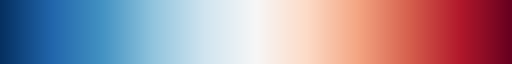

In [ ]:
def color(*x): return '#'+''.join(map(lambda x: hex(int(x*255))[2:].zfill(2), x[:3]))
cmap = sns.color_palette("RdBu_r", as_cmap=True)
cmap

In [ ]:
def industry_map(df_2, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2['단위면적당거래금액'].median(), df_2['단위면적당거래금액'].std()
    for lat,lon,price in df_2[['latitude','longitude','단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat,lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
            ).add_to(s_map)
    for name,lat,lon in department_store[['사업장명', 'lat', 'lon']].values:
        folium.Marker(
            location=(lat,lon),
            tooltip=name,
            opacity=stn_opacity,
            icon=BeautifyIcon(
                icon='star',
                inner_icon_style='color:green;',
                background_color='transparent',
                border_color='transparent')
            ).add_to(s_map)
    return s_map

industry_map(df_2, apt_opacity=.3, stn_opacity=.3)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_2_pusan = df_2[df_2['도'] == '부산시']

def industry_map(df_2_pusan, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_pusan[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_pusan['단위면적당거래금액'].median(), df_2_pusan['단위면적당거래금액'].std()
    for lat,lon,price in df_2_pusan[['latitude','longitude','단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat,lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
            ).add_to(s_map)
    for name,lat,lon in department_store[['사업장명', 'lat', 'lon']].values:
        folium.Marker(
            location=(lat,lon),
            tooltip=name,
            opacity=stn_opacity,
            icon=BeautifyIcon(
                icon='star',
                inner_icon_style='color:green;',
                background_color='transparent',
                border_color='transparent')
            ).add_to(s_map)
    return s_map

industry_map(df_2_pusan, apt_opacity=.3, stn_opacity=.3)

In [ ]:
df_2_Gyeonggi = df_2[df_2['도'] == '경기도']

def industry_map(df_2_Gyeonggi, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_Gyeonggi[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_Gyeonggi['단위면적당거래금액'].median(), df_2_Gyeonggi['단위면적당거래금액'].std()
    for lat,lon,price in df_2_Gyeonggi[['latitude','longitude','단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat,lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
            ).add_to(s_map)
    for name,lat,lon in department_store[['사업장명', 'lat', 'lon']].values:
        folium.Marker(
            location=(lat,lon),
            tooltip=name,
            opacity=stn_opacity,
            icon=BeautifyIcon(
                icon='star',
                inner_icon_style='color:green;',
                background_color='transparent',
                border_color='transparent')
            ).add_to(s_map)
    return s_map

industry_map(df_2_Gyeonggi, apt_opacity=.3, stn_opacity=.3)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_2_ulsan = df_2[df_2['도'] == '울산시']

def industry_map(df_2_ulsan, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_ulsan[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_ulsan['단위면적당거래금액'].median(), df_2_ulsan['단위면적당거래금액'].std()
    for lat,lon,price in df_2_ulsan[['latitude','longitude','단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat,lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
            ).add_to(s_map)
    for name,lat,lon in department_store[['사업장명', 'lat', 'lon']].values:
        folium.Marker(
            location=(lat,lon),
            tooltip=name,
            opacity=stn_opacity,
            icon=BeautifyIcon(
                icon='star',
                inner_icon_style='color:green;',
                background_color='transparent',
                border_color='transparent')
            ).add_to(s_map)
    return s_map

industry_map(df_2_ulsan, apt_opacity=.3, stn_opacity=.3)

In [ ]:
def industry_map(df_2, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2['단위면적당거래금액'].median(), df_2['단위면적당거래금액'].std()
    for lat, lon, price in df_2[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2, apt_opacity=.3, stn_opacity=.3)